<a href="https://colab.research.google.com/github/venusinfire/SenalesySistemas2023-2/blob/main/Parciales/Parcial2_LauraAlarcon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PARCIAL II - SEÑALES Y SISTEMAS**

Laura Daniela Alarcón Castaño

laalarconc@unal.edu.co - 10000035125

**Primer punto**

Encuentre la expresion del espectro de Fourier (forma exponencial y trigonométrica) para la señal $x(t)=|6\sin(3t+\frac{\pi}{4})|^2$, con $t\in [-\pi, \pi]$. Presente las simulaciones respectivas para graficar el espectro y la reconstrucción de la señal en función del número de armónicos y el error relativo. Ver Cuaderno guía serie de Fourier

Para simplificar la expresión $x(t) = |6\sin(3t+\frac{\pi}{4})|^2$, primero eliminaremos el valor absoluto y luego elevaremos al cuadrado:

$$x(t) = (6\sin(3t+\frac{\pi}{4}))^2$$

Ahora, podemos simplificar el cuadrado:

$$x(t) = 6^2\sin^2(3t+\frac{\pi}{4})$$

$$x(t) = 36\sin^2(3t+\frac{\pi}{4})$$

Usando la identidad trigonométrica $\sin(\alpha + \beta) = \sin(\alpha)\cos(\beta) + \cos(\alpha)\sin(\beta)$, podemos expresar $$\sin(3t+\frac{\pi}{4})$$ de la siguiente manera:

$$\sin(3t+\frac{\pi}{4}) = \sin(3t)\cos\left(\frac{\pi}{4}\right) + \cos(3t)\sin\left(\frac{\pi}{4}\right)$$

Dado que $\cos\left(\frac{\pi}{4}\right) = \sin\left(\frac{\pi}{4}\right) = \frac{\sqrt{2}}{2}$, simplificamos aún más:

$$\sin(3t+\frac{\pi}{4}) = \frac{\sqrt{2}}{2}\sin(3t) + \frac{\sqrt{2}}{2}\cos(3t)$$

Ahora sustituimos esto en nuestra expresión:

$$x(t) = 36\left(\frac{\sqrt{2}}{2}\sin(3t) + \frac{\sqrt{2}}{2}\cos(3t)\right)^2$$

Aplicamos la propiedad distributiva y simplificamos:

$$x(t) = 18\left(\sin(3t) + \cos(3t)\right)^2$$

$$x(t) = 18\left(\sin^2(3t) + 2\sin(3t)\cos(3t) + \cos^2(3t)\right)$$


Usando la identidad trigonométrica $$\sin^2(\theta) + \cos^2(\theta) = 1$$, podemos simplificar aún más:

$$x(t) = 18\left(1 + 2\sin(3t)\cos(3t)\right)$$

Finalmente, podemos aplicar la identidad trigonométrica $$\sin(2\theta) = 2\sin(\theta)\cos(\theta)$$

Entonces nuestra función quedaría:

$$\boxed{x(t) = 18\left(1 + \sin(6t)\right)}$$





Se genera y grafica la señal anterior. Se asegura de que la frecuencia de muestreo sea al menos el doble de la frecuencia fundamental de la señal para cumplir con el Teorema del Muestreo de Nyquist.

wo= 1.0
Fo= 1.5707963267948966


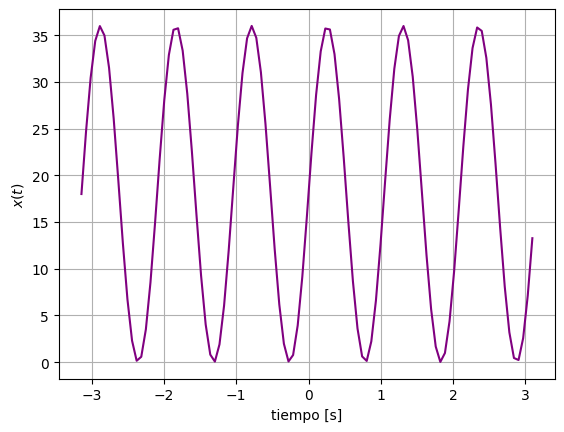

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,IntSlider


ti = -np.pi #tiempo inicial
tf = np.pi #tiempo final
wo = 2*np.pi/(tf-ti) #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs = 10*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo
xo = (np.abs(6*np.sin(3*tv+(np.pi/4))))**2 #señal de entrada original
x = abs(6 * np.sin(3 * tv + np.pi/4))**2 #señal de entrada

plt.plot(tv,x,color='purple') #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')
plt.grid()
plt.show()



Aqui visualizamos las bases de la Serie Exponencial Compleja de Fourier en un intervalo de tiempo especificado. Se define un número de armónicos a simular, se calculan y almacenan las bases en una matriz. Luego, se proporciona una función interactiva para graficar las bases y explorarlas mediante un deslizador que varía el índice de las bases. Esto facilita la comprensión de cómo se componen las señales complejas en términos de estas bases fundamentales.

In [100]:
#Se crean las bases de la Serie Exponencial Compleja de Fourier.
T=tf-ti #Intervalo de interés
N=20 #Número armonicos a simular
wo=2*np.pi/T #Frecuencia fundamental
#Definimos las bases:
phin=np.zeros((len(tv), 2*N+1), dtype=np.complex_) #Crear matriz para guardar bases
for n in range(-N, N+1, 1):
    phin[:, n+N]=np.exp(1j*n*wo*tv) #Base Exponencial Compleja de Fourier en el intérvalo de interés.
#Para graficar las bases:
def pltbase(n=1):
    plt.plot(tv, np.real(phin[:, int(n+N)]), label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]", fontsize = 14)
    plt.ylabel("$\phi_n$(t)", fontsize= 14)
    plt.plot(tv, np.imag(phin[:, int(n+N)]), label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltbase, n=(-N,N,1))
plt.show()

interactive(children=(IntSlider(value=1, description='n', max=20, min=-20), Output()), _dom_classes=('widget-i…

Calculamos el espectro de una señal y permite cambiar sus componentes. Se definen coeficientes complejos cn que representan los niveles de los armónicos de la señal. Luego, se grafica el espectro de la señal en términos de la parte real, la parte imaginaria, la magnitud y la fase de los coeficientes complejos. Esto facilita la visualización y el análisis del contenido espectral de la señal estudiada.


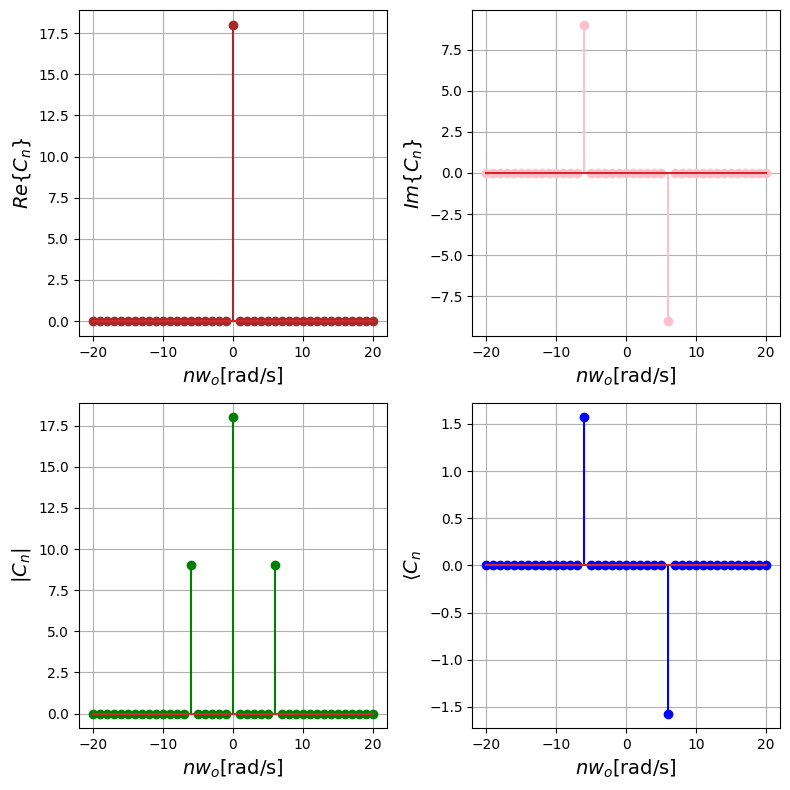

In [101]:
#Calcular el espectro y cambiar según la señal estudiada:
cn=np.zeros(2*N+1, dtype=np.complex_)
nv=np.linspace(-N, N, 2*N+1) #Vector de armónicos
cn[N]=18 #Nivel DC de C0
cn[N-6]=9j #Armónico -6
cn[N+6]=-9j #Armónico 6
#Graficar espectro:
fig=plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.stem(nv, np.real(cn), 'brown') #Gráfica de la parte real del espectro
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$Re\{C_n\}$', fontsize=14)
plt.axis('tight')
plt.grid()
plt.subplot(2, 2, 2)
plt.stem(nv, np.imag(cn), 'pink') #Grafica de la parte imaginaria del espectro
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$Im\{C_n\}$', fontsize=14)
plt.axis('tight')
plt.grid()
plt.subplot(2, 2, 3)
plt.stem(nv, abs(cn), 'g') #Magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$|C_n|$', fontsize=14)
plt.axis('tight')
plt.grid()
plt.subplot(2, 2, 4)
plt.stem(nv, np.angle(cn), 'b') #Fase del espectro
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$\langle C_n$', fontsize=14)
plt.axis('tight')
plt.grid()
fig.tight_layout()
plt.show()

Realizamos la reconstrucción de una señal filtrada a partir de sus coeficientes espectrales. Se utiliza un parámetro `Na` para seleccionar un rango de armónicos a considerar en la reconstrucción. La señal reconstruida se calcula como la combinación de las bases de Fourier correspondientes a estos armónicos. La función `pltest` permite visualizar la señal reconstruida (`xe`) y la señal original (`x`), junto con un cálculo del error relativo. Esto permite analizar cómo la señal se aproxima a la original al considerar diferentes rangos de armónicos en la reconstrucción.

In [102]:
Px=486 #Potencia de la señal x(t)
def pltest(Na=1):
    ind=range(N-Na, N+Na+1)
    er=1-np.sum(abs(cn[ind])**2)/Px
#Señal reconstruida:
    xe=phin[:, ind].dot(cn[ind]) #dot calcula el producto punto entre vectores
    plt.plot(tv, xe, color='brown', label='$x_e(t)$') #Señal estimada o filtrada
    plt.plot(tv, x, color='purple', label='$x(t)$') #Señal original
    plt.title('ER=%.2f[%%]'%(100*er), fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltest, Na=(1, N, 1))
plt.show()

interactive(children=(IntSlider(value=1, description='Na', max=20, min=1), Output()), _dom_classes=('widget-in…

# **Segudo Punto**

Sea la señal portadora $c(t) = A_c\cos(2\pi F_c t),$ con $A_c,F_c\in\mathbb{R},$ y la señal mensaje $m(t)\in\mathbb{R}$. Encuentre el espectro en frecuencia de la señal modulada en amplitud (AM), $y(t) = \left(1+\frac{m(t)}{A_c}\right)c(t)$. Luego, descargue desde youtube $5$ segundos de su canción favorita (capturando del segundo 20 al 25). Presente una simulación de modulación por amplitud AM (tomando como mensaje el fragmento de la canción escogida y con un índice de modulación de 1). Grafique las señales en tiempo y frecuencia (magnitud) de la señal mensaje, portadora y modulada. Reproduzca los fragmentos de audio del mensaje, portadora y senal modulada. Nota: se sugiere utilizar un canal de señal de audio para el desarrollo del ejercicio. Ver Cuaderno guía modulacion AM.

La transformada de Fourier de la señal modulada se puede encontrar como:

$$Y(\omega) = \mathcal{F}\{y(t)\} = \mathcal{F}\left\{\left(1+\frac{m(t)}{A_c}\right)c(t)\right\}=\mathcal{F}\{c(t)\}+\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\}$$

En este caso (utilizando tablas de Fourier):

$$C(\omega) = \mathcal{F}\{c(t)\} = \mathcal{F}\{A_c\sin(2\pi F_c t)\} = A_c\mathcal{F}\left\{\frac{e^{2\pi F_ct}-e^{-2\pi F_ct}}{2j}\right\}$$

y

$$\mathcal{F\{e^{\pm j\omega_0 t}\}} = 2\pi\delta(\omega \mp \omega_0)$$

Por consiguiente:

$$\boxed{C(\omega) = \frac{A_c\pi}{j}(\delta(\omega - 2\pi F_c)-\delta(\omega + 2\pi F_c))}$$

De forma similar:

$$\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\} = \frac{1}{A_c}\mathcal{F}\{m(t)A_c\cos(2\pi F_c t)\} = \mathcal{F}\{m(t)\cos(2\pi F_c t)\} = \mathcal{F}\left\{\frac{m(t)e^{2\pi F_ct}-m(t)e^{-2\pi F_ct}}{2j}\right\}$$

teniendo en cuenta que:

$$\mathcal{F}\{x(t)e^{\pm j\omega_0t}\} = X(\omega \mp \omega_0)$$


Entonces:

$$\boxed{\frac{1}{A_c}\mathcal{F}\{m(t)c(t)\} = \frac{1}{2j}\left(M(\omega - 2\pi F_c)-M(\omega + 2\pi F_c)\right)}$$


Finalmente, el espectro de la señal modulada se puede escribir como:

$$\boxed{Y(\omega) = \frac{A_c\pi}{j}(\delta(\omega - 2\pi F_c)-\delta(\omega + 2\pi F_c)) + \frac{1}{2j}\left(M(\omega - 2\pi F_c)-M(\omega + 2\pi F_c)\right)}$$

En la parte teórica del parcial, se puede ver el procedimiento.


Descargamos la canción favorita nuestra de YouTube.

In [103]:
#Simulación con canción de YouTube:
import soundfile as sf #Instalar pip install soundfile
from IPython.display import Audio #Librería para reproducir audio

#Instalar api youtube-dl:
!pip install youtube-dl
#Descargar canción de interés:
link="https://music.youtube.com/watch?v=f2tuieXb718"
!youtube-dl --extract-audio -o "audio.%(mp3)s" --audio-format mp3 {link}

[youtube] f2tuieXb718: Downloading webpage
[download] Destination: audio.NA
[download] 100% of 3.33MiB in 00:51
[ffmpeg] Correcting container in "audio.NA"
[ffmpeg] Destination: audio.mp3
Deleting original file audio.NA (pass -k to keep)


In [134]:
#Convertir a .wav con ffmpeg para extraer audio en python:
!ffmpeg -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [105]:
#instalar soundfile para cargar .wav
!pip install soundfile

In [106]:
#Leer archivo .wav:
nombre_out="output.wav"
xa, fs=sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de Muestreo %.2f[Hz]\naudio %s' % (fs, nombre_out))

Frecuencia de Muestreo 44100.00[Hz]
audio output.wav


Aquí se copia una señal de audio original ("xa") para su procesamiento. Luego, selecciona un fragmento de 5 segundos de la canción original, comenzando desde el segundo 20 hasta el segundo 25, y almacena este fragmento en la variable "m".

In [107]:
xpro = xa.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [108]:
#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)

Aquí generamos la representación en el dominio del tiempo de una señal de mensaje, del fragmento de la canción.

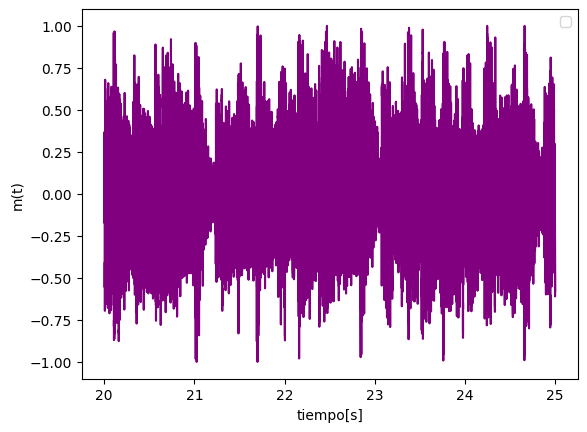

In [152]:
import numpy as np
import matplotlib.pyplot as plt

#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m,color='purple') #graficar señal mensaje en el tiempo
plt.xlabel('tiempo[s]')
plt.ylabel('m(t)')
plt.legend()
plt.show()

Aquí se realizó una transformada de Fourier de la señal de mensaje en el dominio de la frecuencia y representa su espectro. Luego, se grafican la magnitud y la fase del espectro en función de la frecuencia. Esto permite visualizar cómo se distribuyen las componentes de frecuencia en la señal de mensaje y cómo cambian las fases de estas componentes en función de la frecuencia.

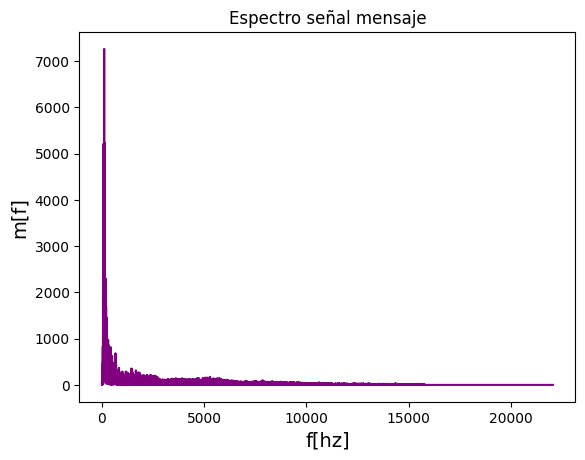

Text(0, 0.5, '$')

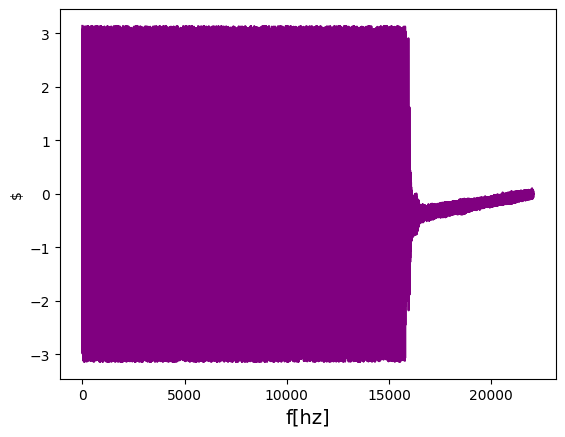

In [157]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw),color='purple')#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'f[hz]',fontsize = 14)
plt.ylabel(r'm[f]',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw),color='purple')#fase del espectro
plt.xlabel(r'f[hz]',fontsize = 14)
plt.ylabel(r'$')

Se fija una $F_c >> F_{max},$ para nuestro caso:

$$\boxed{F_c = 15000 [Hz]}$$

Además, teniendo en cuenta que el índice de modulación se define como:

$$ I_m = \frac{\max(|m(t)|)}{A_c}$$

In [111]:
Fc = 15000 #frecuencia portadora
Im = 1# Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*tt) #portadora

In [112]:
#repoducir portadora
Audio(c,rate=fs)

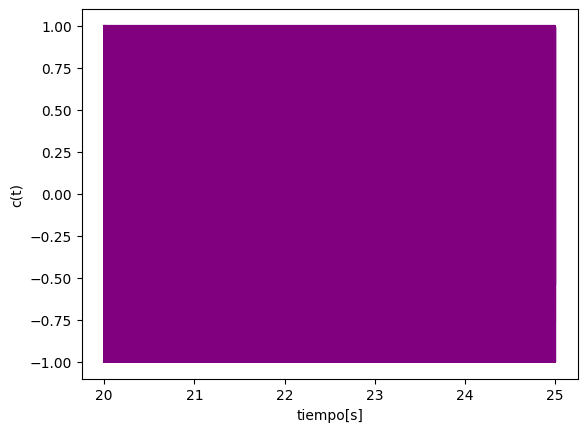

In [158]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c,color='purple') #graficar señal mensaje en el tiempo
plt.xlabel('tiempo[s]')
plt.ylabel('c(t)')
plt.show()

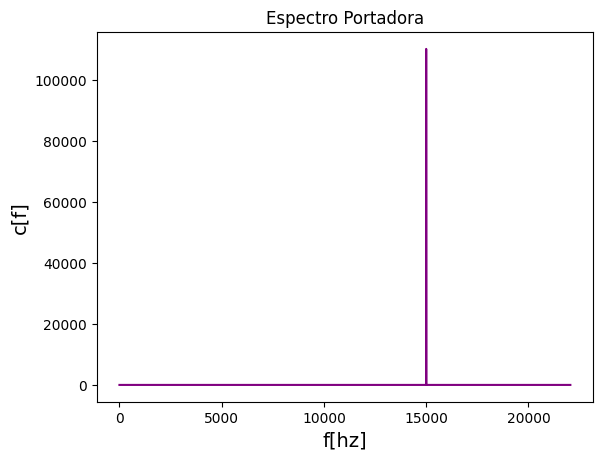

Text(0, 0.5, '$')

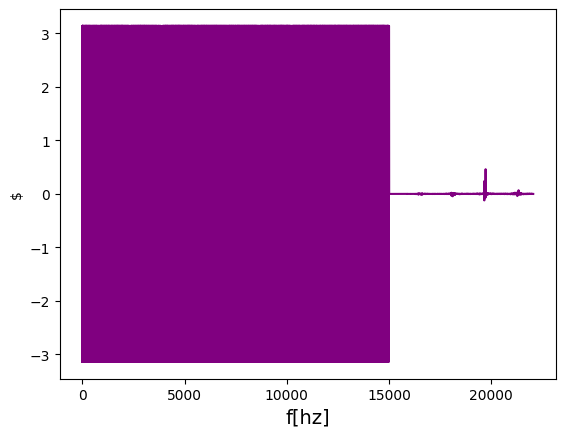

In [159]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw),color='purple')#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'f[hz]',fontsize = 14)
plt.ylabel(r'c[f]',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Cw),color='purple')#fase del espectro
plt.xlabel(r'f[hz]',fontsize = 14)
plt.ylabel(r'$')

In [115]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM

In [116]:
#repoducir modulada
Audio(y,rate=fs)

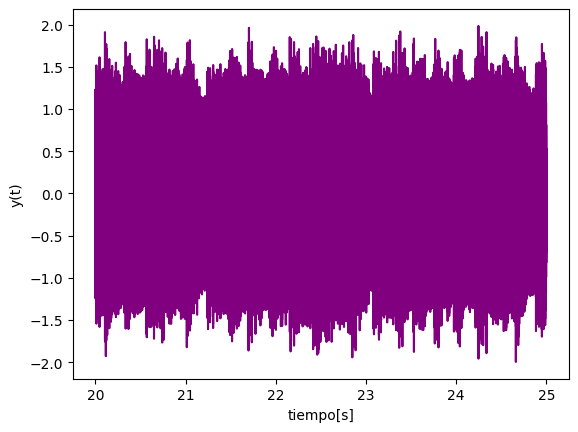

In [160]:
plt.plot(tt,y,color='purple') #graficar señal mensaje en el tiempo
plt.xlabel('tiempo[s]')
plt.ylabel('y(t)')
plt.show()

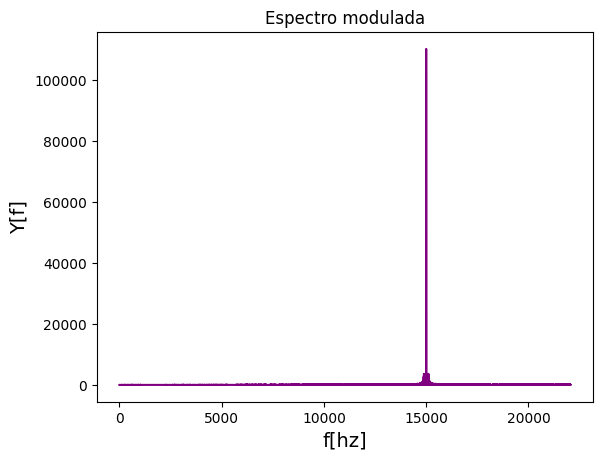

Text(0, 0.5, '$')

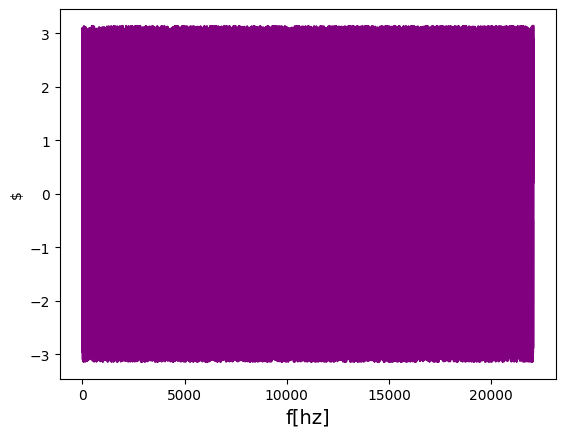

In [161]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw),color='purple')#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'f[hz]',fontsize = 14)
plt.ylabel(r'Y[f]',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Yw),color='purple')#fase del espectro
plt.xlabel(r'f[hz]',fontsize = 14)
plt.ylabel(r'$')

# **Tercer Punto -  Detección de fallos en motor**

Se descarga la base de datos para el monitoreo de fallas y Se importan las librerías necesarias

In [119]:
import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split
import pandas as pd

warnings.filterwarnings('ignore')

#Data downloaded for Google Drive:
FILEID="1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir

--2023-10-28 04:09:38--  https://docs.google.com/uc?export=download&confirm=t&id=1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn
Resolving docs.google.com (docs.google.com)... 74.125.202.102, 74.125.202.113, 74.125.202.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.202.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/61lgklakl2m078vqdlgvgoeaitem9lds/1698466125000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=7ec29df5-f01c-40a4-b645-7d3d85756d1d [following]
--2023-10-28 04:09:38--  https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/61lgklakl2m078vqdlgvgoeaitem9lds/1698466125000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=7ec29df5-f01c-40a4-b645-7d3d85756d1d
Resolving doc-10-0s-docs.googleusercontent.com (doc-10-0s-docs.googleusercontent.com)... 142.251.161.132,

Se almacena la información de la base de datos en un diccionario

In [120]:
#Cargar datos:
path_='CaractCE.mat' #Case Western Database
dicX=sio.loadmat(path_)
#Mostrar las claves disponibles en el diccionario:

import scipy.io as sio

#Cargar los datos desde el archivo .mat:
path_='CaractCE.mat'
dicX=sio.loadmat(path_)
#Iterar a través de todas las claves y mostrarlas una por una:
for key in dicX:
    print(key)
#Iterar a través de las claves en el diccionario y mostrar los datos asociados a cada clave:
for key, value in dicX.items():
    print(f'Base de Datos: {key}')
    print(value)
    print('\n')

__header__
__version__
__globals__
CE
E
F
Base de Datos: __header__
b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jul 21 06:26:43 2018'


Base de Datos: __version__
1.0


Base de Datos: __globals__
[]


Base de Datos: CE
[[-2.82991778e+03 -5.05738346e+03  3.20558619e+03 ...  6.38080957e+00
   7.68604627e+00  8.17023104e+00]
 [-2.86869478e+03 -5.00993965e+03  3.19676653e+03 ...  6.40760702e+00
   7.69964487e+00  8.17002744e+00]
 [-2.95145599e+03 -5.13354811e+03  3.18277814e+03 ...  6.39972309e+00
   7.71905087e+00  8.17839470e+00]
 ...
 [-9.45334754e+03 -1.30512052e+04  1.93672415e+03 ...  6.42458072e+00
   7.72999447e+00  8.17061531e+00]
 [-8.43847687e+03 -1.18579421e+04  2.10372911e+03 ...  6.36443646e+00
   7.65425929e+00  8.13380289e+00]
 [-8.84877618e+03 -1.15516835e+04  2.08918848e+03 ...  6.40814893e+00
   7.71778834e+00  8.17584808e+00]]


Base de Datos: E
[[ 0  0  1]
 [ 0  0  1]
 [ 0  0  1]
 ...
 [ 1  3 10]
 [ 1  3 10]
 [ 1  3 10]]


Base de Datos: F
[[ 0.01460308  

In [121]:
Xt=dicX['F']
print(Xt.shape)

(1200, 4000)


In [122]:
Xt=dicX['F'] #Datos en el tiempo
Fs=12000 #Frecuencia de muestreo
Tl=Xt.shape[1]/Fs #Tamaño del segmento
print('X(t) shape:', Xt.shape)
print('Tiempo [s]', Tl)
Y=dicX['E']
Ytrue=Y[:,2] #Clases de fallos en los rodamientos
labels_ = ['NOR', 'IR1_0.007´´', 'IR1_0.014´´', 'IR1_0.021´´',
           'IR2_0.007´´', 'IR2_0.014´´', 'IR2_0.021´´',
           'BE_0.007´´', 'BE_0.014´´', 'BE_0.021´´'
           ] #Nombres de las clases

X(t) shape: (1200, 4000)
Tiempo [s] 0.3333333333333333


In [123]:
print(Ytrue.shape) #Etique membresia de los datos, diez posibles valores
print(np.unique(Ytrue))

(1200,)
[ 1  2  3  4  5  6  7  8  9 10]


In [124]:
#Partir datos para train y test:
Xtrain, Xtest, Ytrain, _=train_test_split(Xt, Ytrue, test_size=0.3)
print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape}, Xtest shape {Xtest.shape}")

Xtrain shape (840, 4000), Ytrain shape (840,), Xtest shape (360, 4000)


Se calcula la tranformada de Fourier al modelo de entrenamiento X con el fin de obtener su componente espectral

In [125]:
#Calcular el espectro de Fourier a Xtrain:
vf=np.fft.rfftfreq(Xtrain.shape[1], 1/Fs) #Freq vector
Xw=(abs(np.fft.rfft(Xtrain))) #FFT
Xw.shape

(840, 2001)

Se calcula la transformada de Fourier al modelo de pruebas X con el fin de obtener su componente espectral

In [126]:

Xwt = abs(np.fft.rfft(Xtest))
vft = np.fft.rfftfreq(Xtest.shape[1], 1/Fs)

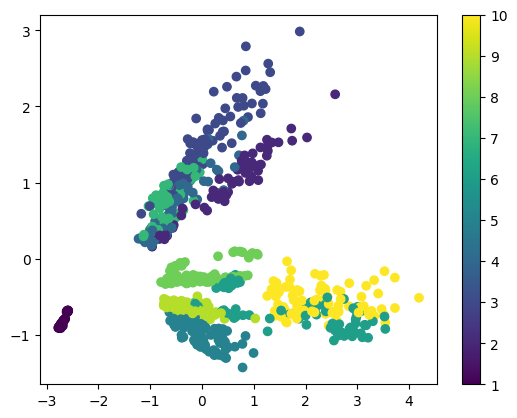

In [127]:
#Graficar espectro para clases representativas:
sca_=MinMaxScaler()
Xw_=sca_.fit_transform(Xw.T).T
#red=TSNE(perplexity=15, n_components=2, random_state=123, learning_rate='auto', init='pca')
red=PCA(n_components=2)
Z=red.fit_transform(Xw_)
plt.scatter(Z[:, 0],Z[:, 1], c=Ytrain, label='Xtrain')
plt.colorbar()
plt.show()

Xtrain y Xtest en función del tiempo

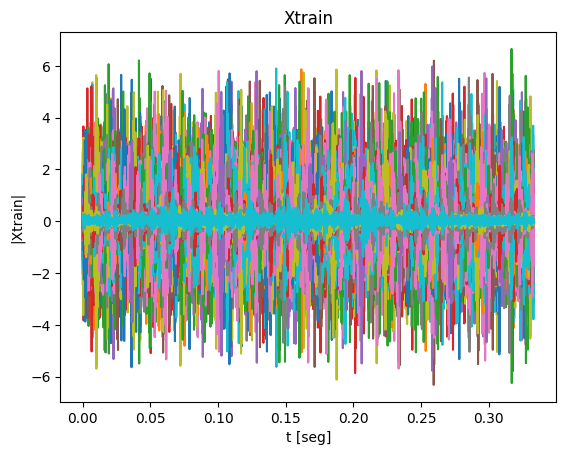

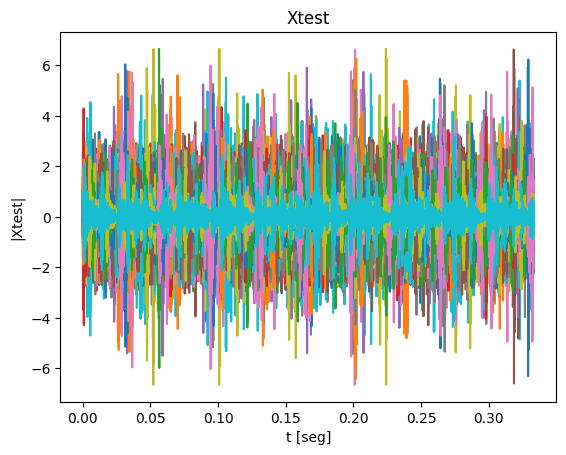

In [136]:
tv = np.arange(0, Tl, 1/Fs)

plt.plot(tv, Xtrain.T)
plt.title('Xtrain')
plt.xlabel('t [seg]')
plt.ylabel('|Xtrain|')
plt.show()

plt.plot(tv, Xtest.T)
plt.title('Xtest')
plt.xlabel('t [seg]')
plt.ylabel('|Xtest|')
plt.show()

se calcula y representa el valor promedio de las señales en los conjuntos de entrenamiento (Xtrain) y prueba (Xtest) en el dominio del tiempo. Estos gráficos permiten observar la tendencia promedio de las señales a lo largo del tiempo en ambos conjuntos,

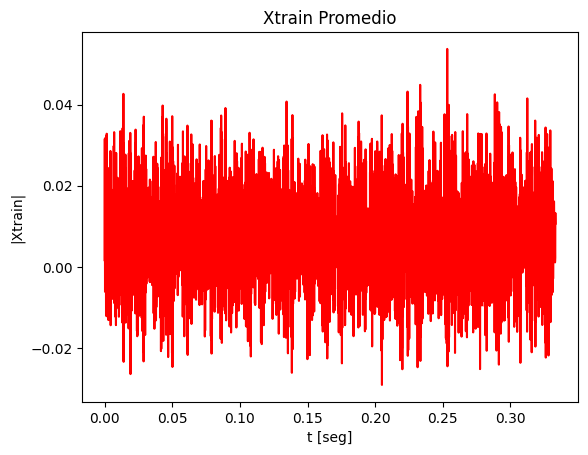

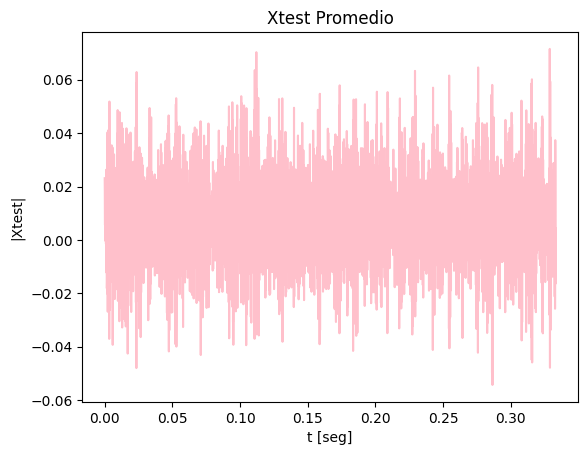

In [151]:
plt.plot(tv, Xtrain.mean(axis=0).T, color='r')
plt.title('Xtrain Promedio')
plt.xlabel('t [seg]')
plt.ylabel('|Xtrain|')
plt.show()

plt.plot(tv, Xtest.mean(axis=0).T, color='pink')
plt.title('Xtest Promedio')
plt.xlabel('t [seg]')
plt.ylabel('|Xtest|')
plt.show()

Aqui se calcula y representa el espectro promedio de un conjunto de datos en el dominio de la frecuencia utilizando la transformada de Fourier. Luego, se grafica el espectro promedio en función de la frecuencia, lo que permite identificar las principales componentes de frecuencia presentes en los datos.

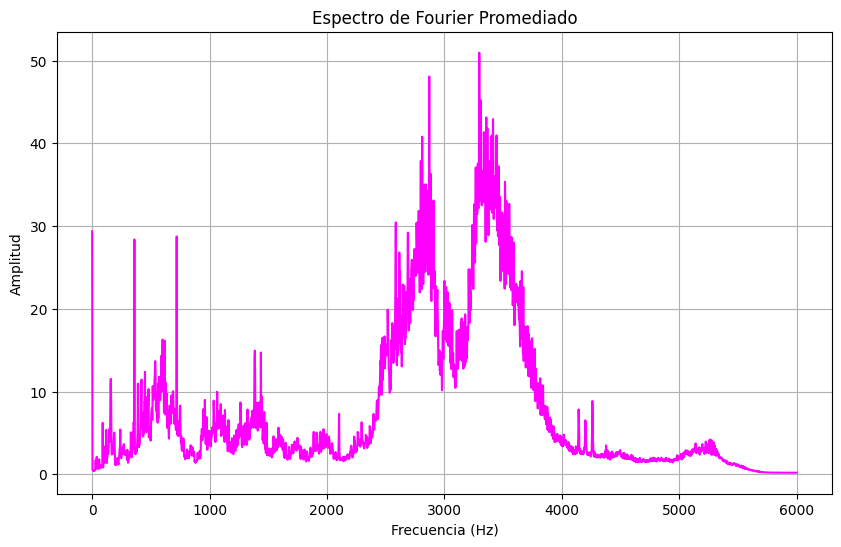

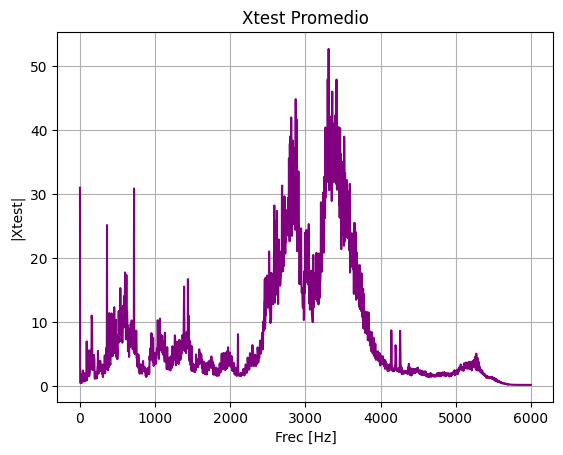

In [147]:
#Suponiendo que se quiere promediar las filas de Xw para obtener un espectro promedio:
spectrum=np.mean(Xw, axis=0)
plt.figure(figsize=(10, 6))
plt.plot(vf, spectrum,color='fuchsia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de Fourier Promediado')
plt.grid(True)
plt.show()

plt.plot(vf, Xwt.mean(axis=0).T,color='purple')
plt.title('Xtest Promedio')
plt.xlabel('Frec [Hz]')
plt.ylabel('|Xtest|')
plt.grid(True)
plt.show()


Se define una función llamada `calcular_señal_promedio` que calcula la señal promedio en el dominio del tiempo y en el dominio de la frecuencia para cada clase en un conjunto de datos etiquetado. Luego, se utiliza esta función para calcular y graficar las señales promedio en el dominio del tiempo y la frecuencia para cada clase, lo que permite comparar y analizar las características de las señales en función de las clases.

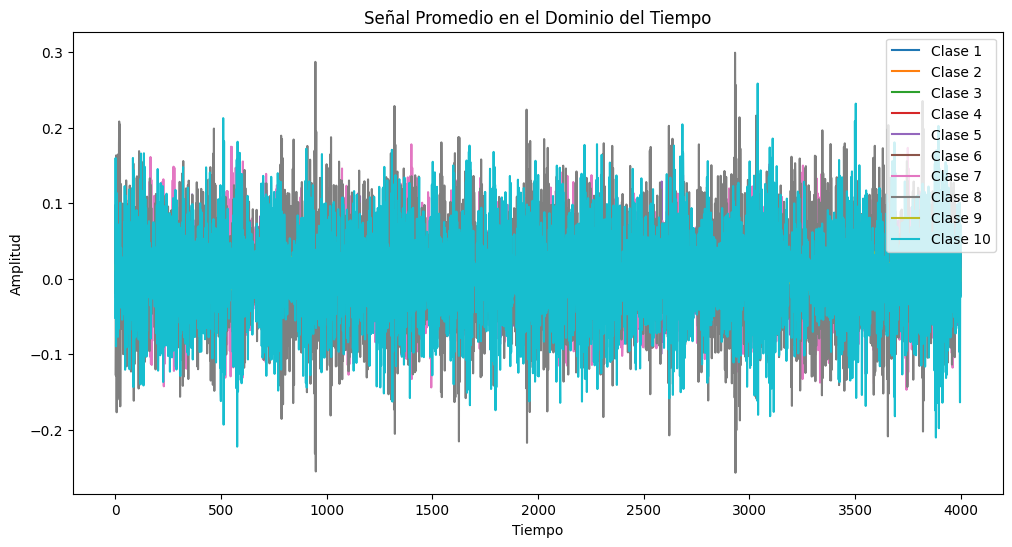

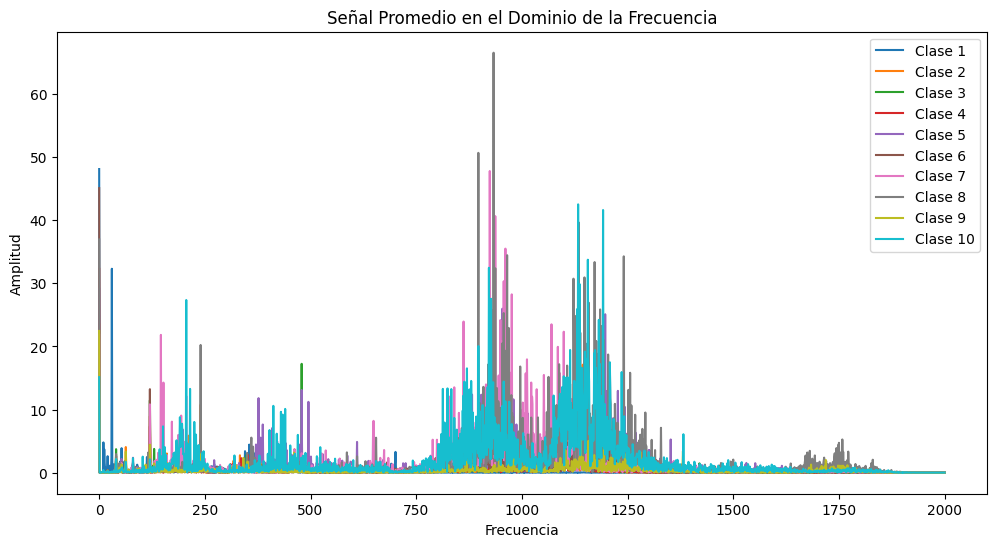

In [129]:
#Función para calcular la señal promedio para cada clase:
def calcular_señal_promedio(X, Y):
    clases=np.unique(Y)
    señales_promedio_tiempo=[]
    señales_promedio_frecuencia=[]
    for clase in clases:
        #Seleccionar las muestras de la clase actual:
        muestras_clase=X[Y==clase]
        #Calcular la señal promedio en el dominio del tiempo:
        señal_promedio_tiempo=np.mean(muestras_clase, axis=0)
        señales_promedio_tiempo.append(señal_promedio_tiempo)
        #Calcular la FFT de la señal promedio:
        señal_promedio_fft=np.abs(np.fft.rfft(señal_promedio_tiempo))
        señales_promedio_frecuencia.append(señal_promedio_fft)
    return clases, señales_promedio_tiempo, señales_promedio_frecuencia
clases, señales_promedio_tiempo, señales_promedio_frecuencia=calcular_señal_promedio(Xtrain, Ytrain)
#Graficar señales promedio en el dominio del tiempo:
plt.figure(figsize=(12, 6))
for i, clase in enumerate(clases):
    plt.plot(señales_promedio_tiempo[i], label=f'Clase {clase}')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal Promedio en el Dominio del Tiempo')
plt.legend()
plt.show()
#Graficar señales promedio en el dominio de la frecuencia:
plt.figure(figsize=(12, 6))
for i, clase in enumerate(clases):
    plt.plot(señales_promedio_frecuencia[i], label=f'Clase {clase}')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.title('Señal Promedio en el Dominio de la Frecuencia')
plt.legend()
plt.show()

Se normaliza los espectros de las señales para evitar inconsistencias debido a diferencias en las amplitudes máximas. Se utiliza el escalador `MinMaxScaler` para llevar los espectros a un rango entre 0 y 1. Luego, se grafican los espectros normalizados. Esto permite comparar y analizar los espectros de las señales de manera consistente, independientemente de las diferencias en sus amplitudes máximas.

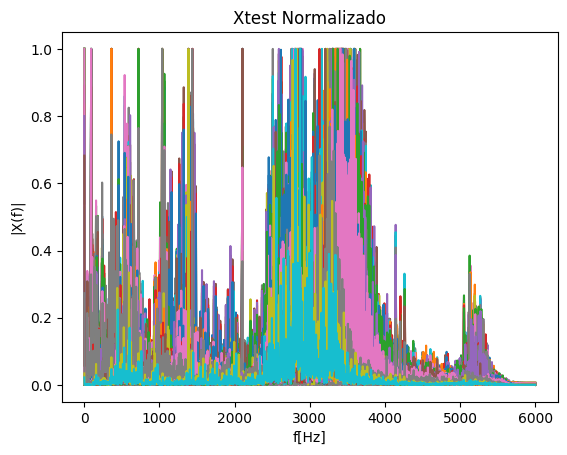

In [130]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
sca = MinMaxScaler()
Xwt_ = sca.fit_transform(Xwt.T).T

plt.plot(vf,Xwt_.T)
plt.title('Xtest Normalizado')
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

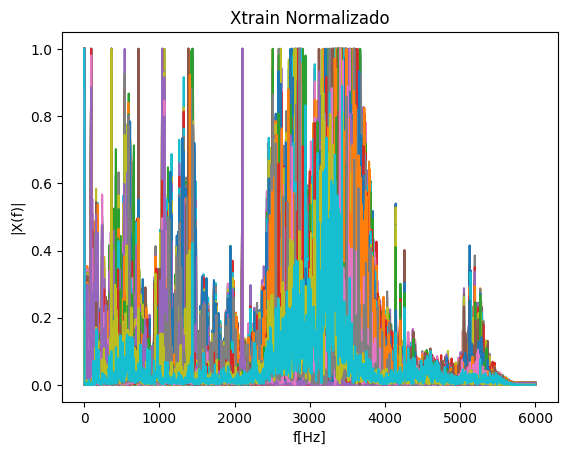

In [135]:
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(Xw.T).T

plt.plot(vf, Xw_.T)
plt.title('Xtrain Normalizado')
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

In [131]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#Entrenar un clasificador SVM:
clf=SVC(kernel='linear')
clf.fit(Xtrain, Ytrain)
#Realizar predicciones en el conjunto de prueba (Xtest):
Ypred=clf.predict(Xtest)
#Calcular la precisión de las predicciones:
accuracy=accuracy_score(_, Ypred)
print(f"Precisión del detector de fallos: {accuracy * 100:.2f}%")

Precisión del detector de fallos: 29.17%


Se calcula la distancia entre los componentes espectrales, se almacenan en un vector al que luego se le buscará el valor mínimo de cada fila, y ese será el tipo de fallo al que corresponda

In [132]:
# Inicializa el diccionario de recount
i = 1
recount = {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0}

# Realiza predicciones en el conjunto de prueba
Ypred = clf.predict(Xtest)

# Mapeo de etiquetas a nombres de clases
etiquetas_clases = ['NOR', 'IR1_0.007', 'IR1_0.014', 'IR1_0.021', 'IR2_0.007', 'IR2_0.014', 'IR2_0.021', 'BE_0.007', 'BE_0.014', 'BE_0.021']

# Mostrar los tipos de fallos detectados en Xtest y contarlos
print("Tipos de fallos detectados en Xtest:")
for i in range(len(Ypred)):
    if Ypred[i] >= 0 and Ypred[i] < len(etiquetas_clases):
        clase_predicha = etiquetas_clases[Ypred[i]]
        print(f"Muestra {i + 1}: {clase_predicha}")
        # Incrementa el recuento de la clase predicha
        recount[str(Ypred[i] + 1)] += 1
    else:
        print(f"Muestra {i + 1}: Clase fuera de rango")

# Imprimir el recuento de errores
print("Recuento de errores:")
for key, value in recount.items():
    print(f"Error {key}: {value} veces")


Tipos de fallos detectados en Xtest:
Muestra 1: BE_0.007
Muestra 2: IR1_0.007
Muestra 3: IR1_0.007
Muestra 4: BE_0.021
Muestra 5: IR1_0.014
Muestra 6: IR1_0.021
Muestra 7: BE_0.021
Muestra 8: BE_0.021
Muestra 9: IR1_0.014
Muestra 10: IR1_0.007
Muestra 11: BE_0.021
Muestra 12: IR2_0.014
Muestra 13: IR2_0.007
Muestra 14: IR1_0.007
Muestra 15: IR1_0.007
Muestra 16: BE_0.021
Muestra 17: IR1_0.021
Muestra 18: IR1_0.021
Muestra 19: IR1_0.007
Muestra 20: IR1_0.014
Muestra 21: IR1_0.007
Muestra 22: IR2_0.014
Muestra 23: IR1_0.007
Muestra 24: BE_0.021
Muestra 25: IR1_0.014
Muestra 26: IR1_0.007
Muestra 27: IR1_0.014
Muestra 28: IR2_0.021
Muestra 29: Clase fuera de rango
Muestra 30: IR2_0.007
Muestra 31: IR2_0.007
Muestra 32: IR1_0.007
Muestra 33: BE_0.021
Muestra 34: IR2_0.021
Muestra 35: IR1_0.007
Muestra 36: IR2_0.007
Muestra 37: BE_0.021
Muestra 38: IR1_0.007
Muestra 39: IR2_0.007
Muestra 40: IR2_0.014
Muestra 41: IR1_0.014
Muestra 42: IR2_0.007
Muestra 43: IR2_0.021
Muestra 44: IR1_0.007
Mu

Se imprime el número de fallos por categoría y el número total de fallos

In [133]:
from scipy.spatial.distance import cdist

v_results = []

for i in range(len(Xtest)):
    distance = cdist(Xwt_, Xw_)
    v_results.append(Ytrain[np.argmin(distance[i,])])
print(f'El total de fallos por categoría fue:\n')
i = 0
for fault in recount.keys():
    print(f'{labels_[int(fault)-1]}: {recount[fault]}')
    i += int(recount[fault])

print(f'\nFallos totales: {i}')


El total de fallos por categoría fue:

NOR: 0
IR1_0.007´´: 89
IR1_0.014´´: 48
IR1_0.021´´: 40
IR2_0.007´´: 51
IR2_0.014´´: 13
IR2_0.021´´: 37
BE_0.007´´: 7
BE_0.014´´: 8
BE_0.021´´: 63

Fallos totales: 356
